In [2]:
import numpy as np
import matplotlib.pyplot as plt

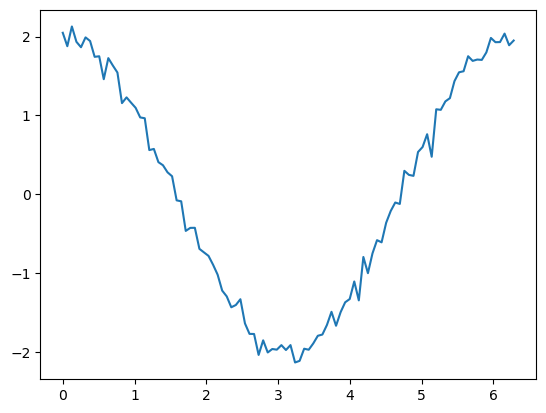

In [23]:
np.random.seed(1234)
tt = np.linspace(0, 2*np.pi, 100)
beta = 2
sisi = beta*np.cos(tt) + 0 + np.random.randn(tt.shape[0])*0.1
sisi_p = -beta*np.sin(tt)

plt.plot(tt, sisi)

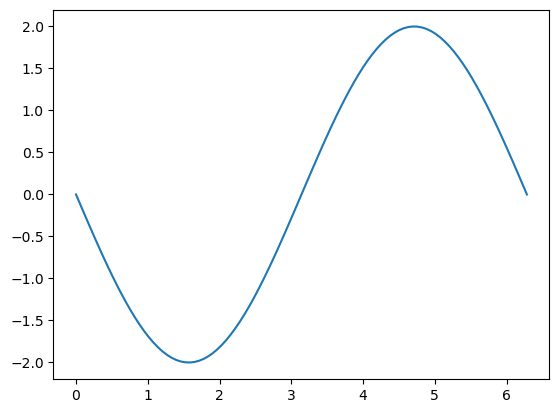

In [24]:
plt.plot(tt, sisi_p)

In [25]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim  
import torch.nn.functional as F

In [26]:
t_tensor = Tensor(tt.reshape(-1, 1))
y_tensor = Tensor(sisi.reshape(-1, 1))
y_p_tensor = Tensor(sisi_p.reshape(-1, 1))

In [27]:
class DNN(nn.Module):
    
    def __init__(self, beta):
        super().__init__()
        
        self.beta = beta
        
        self.act_fn = F.relu
        
        self.l1 = nn.Linear(1, 16)
        self.l2 = nn.Linear(16, 32)
        self.l3 = nn.Linear(32, 64)
        self.l4 = nn.Linear(64, 64)
        self.l5 = nn.Linear(64, 64)
        self.l6 = nn.Linear(64, 32)
        self.l7 = nn.Linear(32, 16)
        self.l8 = nn.Linear(16, 1)
    
    def forward(self, x):

        x = self.act_fn(self.l1(x))
        x = self.act_fn(self.l2(x))
        x = self.act_fn(self.l3(x))
        x = self.act_fn(self.l4(x))
        x = self.act_fn(self.l5(x))
        x = self.act_fn(self.l6(x))
        x = self.act_fn(self.l7(x))
        x = self.l8(x)
        
        output = x 
        return output

In [118]:
beta_hat_ = 4.0

model = DNN(beta_hat_)


beta_hat = torch.tensor([beta_hat_])#, requires_grad=True).float()
beta_hat = nn.Parameter(beta_hat)
model.register_parameter("beta_hat", beta_hat)

optimizer = optim.Adam(model.parameters(), lr=0.02)
loss_fn  = nn.MSELoss()

ll = []

l_d = []
l_data = []

model.train()
for i in range(5000):
    optimizer.zero_grad()
    
    g = t_tensor.clone()
    g.requires_grad = True
        
    u = beta_hat* model(g)
        
    u_t = autograd.grad(u, g, torch.ones((t_tensor.shape[0], 1)), retain_graph=True, create_graph=True)[0]
    
    loss_d = loss_fn(u_t, y_p_tensor)

    loss_data = loss_fn(u, y_tensor)
    
    loss = loss_data #+ loss_d
    
    loss.backward()
    optimizer.step()
    
    if i%200==0:
        ll.append(u.detach().numpy())
        

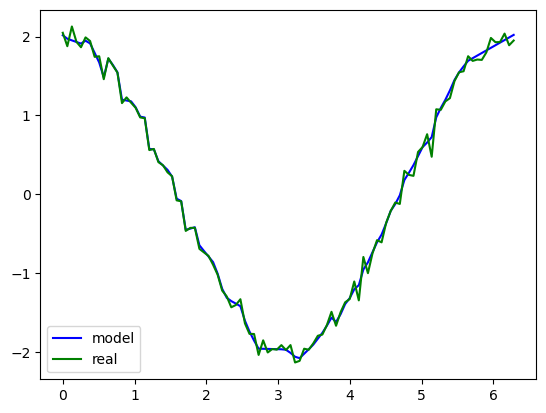

In [119]:
bb = list(model.parameters())[0].detach().numpy()

plt.plot(tt, bb*model(t_tensor).detach().numpy(), label="model", c="blue")
plt.plot(tt, sisi, label="real", c="green")
plt.legend()

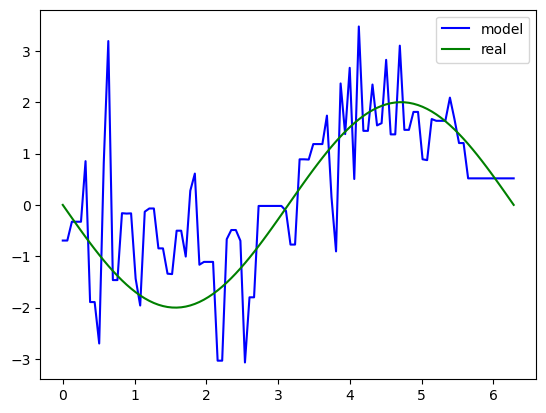

In [120]:
plt.plot(tt, u_t.detach().numpy(), label="model", c="blue")
plt.plot(tt, sisi_p, label="real", c='green')
plt.legend()

In [121]:
print(list(model.parameters())[0])
print("real: ", beta)

Parameter containing:
tensor([3.0174], requires_grad=True)
real:  2


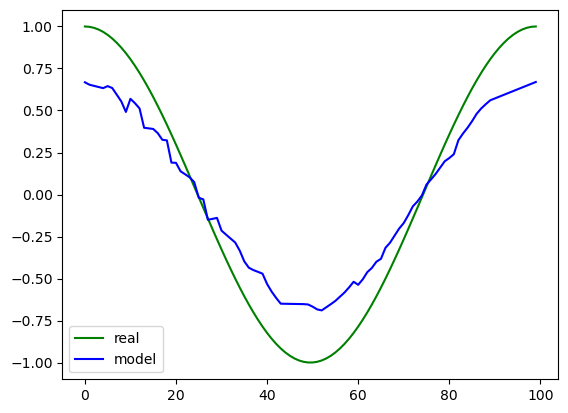

In [122]:
plt.plot(np.cos(tt), label="real", c="green")
plt.plot(model(t_tensor).detach().numpy(), label="model", c="blue")
plt.legend()